<a href="https://colab.research.google.com/github/valentin-lechat/val/blob/master/Evolution_of_COVID_19_in_Spain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importation of the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files


In [0]:
uploaded = files.upload()

Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global (1).csv
Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global (1).csv
Saving time_series_covid19_recovered_global.csv to time_series_covid19_recovered_global (1).csv


In [0]:
#Creation of the table of recorded cases, deaths and recoveries in Spain since January 22nd
Confirmed = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_confirmed_global.csv']))
Deaths = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_deaths_global.csv']))
Recovered = pd.read_csv(io.BytesIO(uploaded['time_series_covid19_recovered_global.csv']))

Spain_Confirmed = Confirmed.loc[Confirmed['Country/Region']=="Spain",:] 
Spain_Confirmed.index = ["Spain Confirmed"]
Spain_Confirmed = Spain_Confirmed.drop (['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

Spain_Deaths = Deaths.loc[Deaths["Country/Region"]=="Spain",:]
Spain_Deaths.index = ["Spain Death"]
Spain_Deaths = Spain_Deaths.drop (['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

Spain_Recovered = Recovered.loc[Recovered["Country/Region"]=="Spain",:]
Spain_Recovered.index = ["Spain Recovered"]
Spain_Recovered = Spain_Recovered.drop (['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

Spain_Total = pd.concat([Spain_Confirmed, Spain_Deaths, Spain_Recovered]) 
Spain_Total.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20
Spain Confirmed,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118
Spain Death,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,5,10,17,28,35,54,55,133,195,289,342,533,623,830,1043,1375,1772,2311,2808,3647,4365,5138,5982,6803,7716,8464,9387
Spain Recovered,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,30,30,32,32,183,183,193,517,517,530,1028,1081,1107,1588,2125,2575,2575,3794,5367,7015,9357,12285,14709,16780,19259,22647


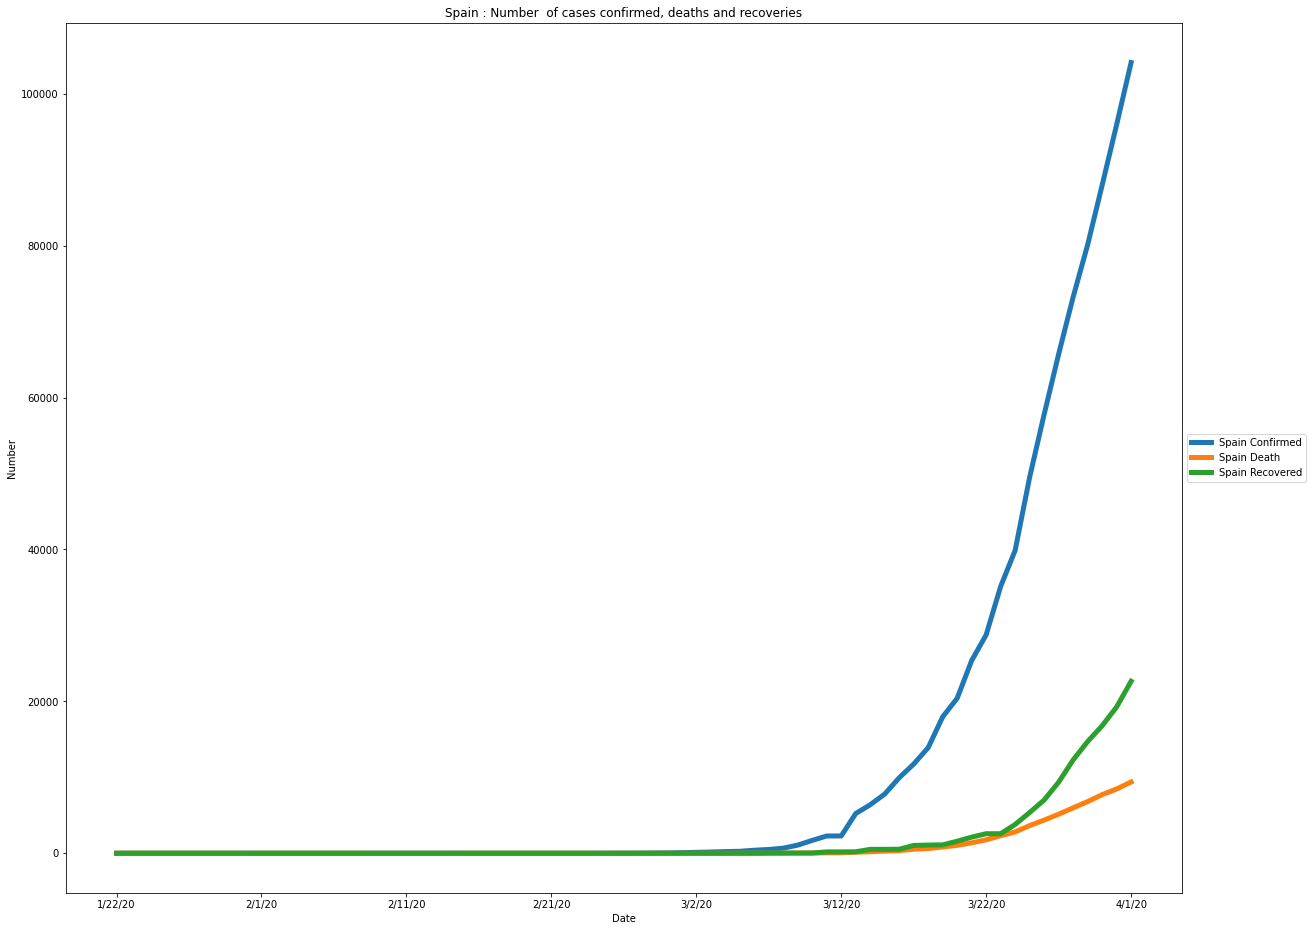

In [0]:
#Creation of the curve of total cases, deaths and recoveries in Spain
Spain_Total_transposed = Spain_Total.transpose();
Spain_Total_transposed.fillna(0).plot(title=("Spain : Number  of cases confirmed, deaths and recoveries"), figsize=(20,16), lw=5)
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

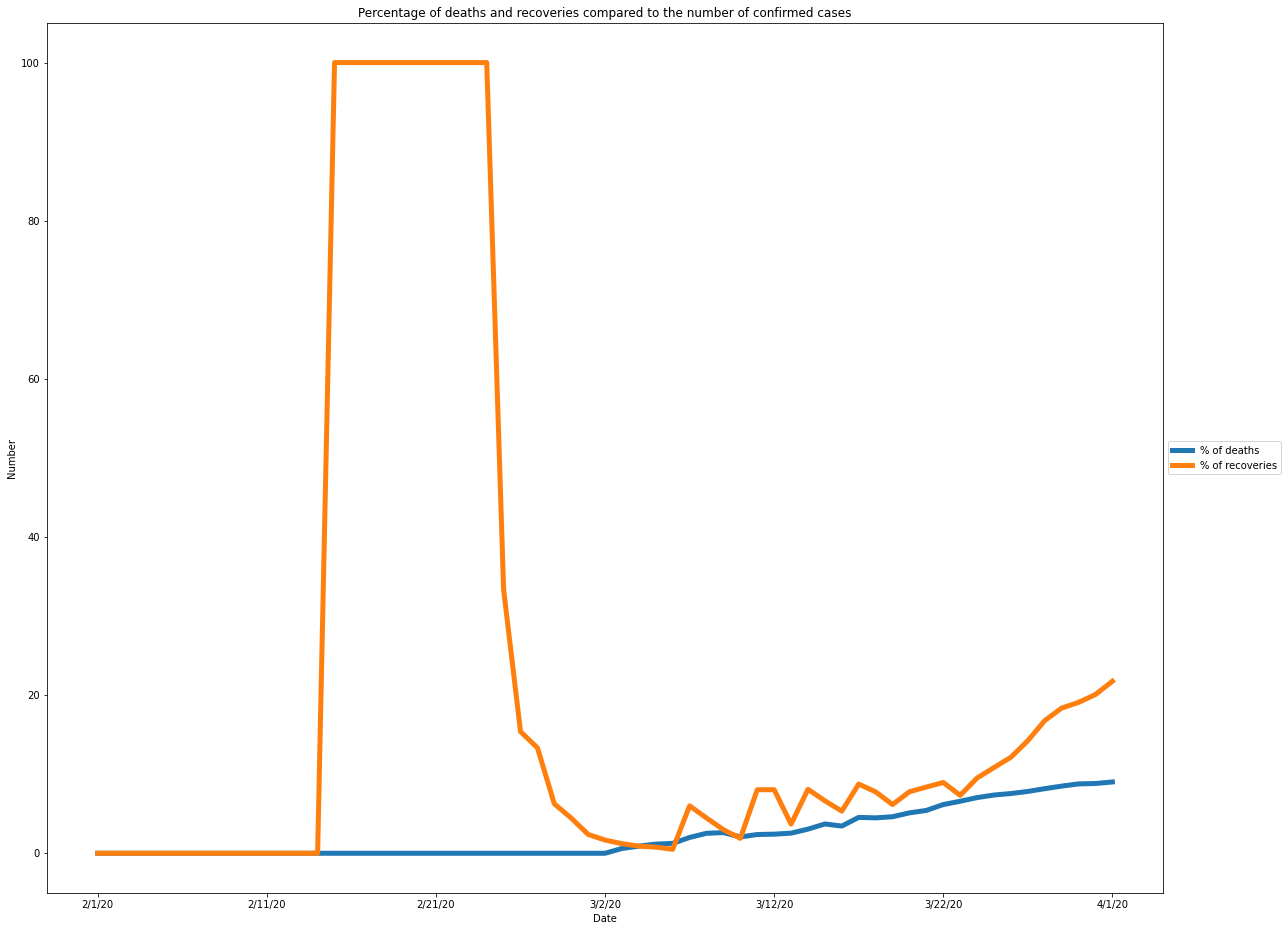

In [0]:
#Creation of the curve of the percentage of deaths and recoveries compared to the number of confirmed cases in Spain
Percentage = {"% of deaths":[], "% of recoveries":[]}
Percentage_Index = []
C = 0

for ligne in Spain_Total_transposed.iterrows():

  Confirmed_Value = int(Spain_Total_transposed['Spain Confirmed'][C])

  if not (Confirmed_Value == 0):
    Death_Value = int(Spain_Total_transposed['Spain Death'][C])
    Recovered_Value = int(Spain_Total_transposed['Spain Recovered'][C])

    Percentage["% of deaths"].append(Death_Value*100/Confirmed_Value)
    Percentage["% of recoveries"].append(Recovered_Value*100/Confirmed_Value)
    Percentage_Index.append(Spain_Total_transposed.index[C])

  C += 1

Total_percentage = pd.DataFrame(Percentage, index = Percentage_Index)
Total_percentage.plot(title=("Percentage of deaths and recoveries compared to the number of confirmed cases"), figsize=(20,16), lw=5)
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()